In [1]:
%pylab inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import cmocean.cm as cmo
from matplotlib.patches import Polygon

Populating the interactive namespace from numpy and matplotlib


/Users/erik/anaconda3/envs/py3_parcels_mpi/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
temp = xr.open_dataset('/Users/erik/Downloads/woa18_decav_t00_01 (1).nc', decode_times=False)

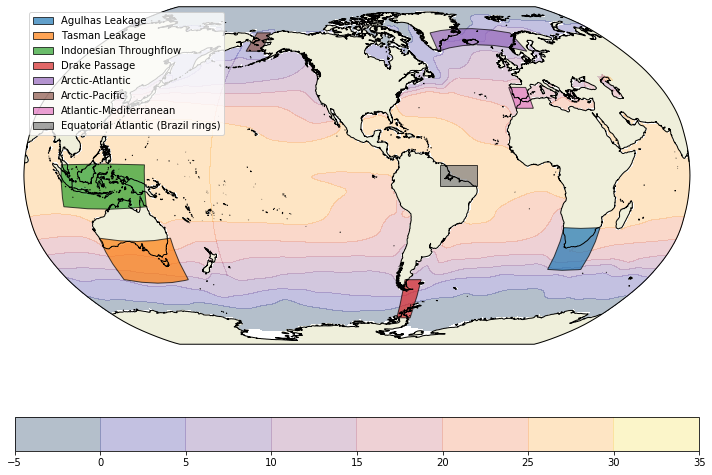

In [6]:
projection = cartopy.crs.Robinson(central_longitude=-100)
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=(10, 7))
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

cyclic_data, cyclic_lons = add_cyclic_point(temp.t_an[0, 0, :, :], coord=temp.lon)
a = ax.contourf(cyclic_lons, temp.lat, cyclic_data, cmap=cmo.thermal, alpha=0.3,
                transform=cartopy.crs.PlateCarree())

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

recs = {'Agulhas Leakage': (15, -45, 20, 20, colors[0]),
        'Tasman Leakage': (115, -50, 40, 20, colors[1]),
        'Indonesian Throughflow': (100, -15, 45, 20, colors[2]),
        'Drake Passage': (-70, -70, 10, 20, colors[3]),
        'Arctic-Atlantic': (-45, 60, 60, 10, colors[4]),
        'Arctic-Pacific': (-175, 60, 10, 10, colors[5]),
        'Atlantic-Mediterranean': (-10, 32, 10, 10, colors[6]),
        'Equatorial Atlantic (Brazil rings)': (-55, -5, 20, 10, colors[7])
        }

for key, v in recs.items():
    ax.add_patch(mpatches.Rectangle(xy=[v[0], v[1]], width=v[2], height=v[3], label=key,
                                    facecolor=v[4], alpha=0.7, linewidth=1,
                                    edgecolor='k', transform=cartopy.crs.Geodetic()))

cb = plt.colorbar(a, orientation="horizontal")  
ax.legend()
plt.tight_layout()
plt.savefig('Ch10_interocean_exchanges.pdf')